**Tumor Classification** 

The dataset I worked on can be downloaded from this website: https://www.kaggle.com/datasets/jakeshbohaju/brain-tumor. \

This project aims to classify brain tumors into three categories: Meningioma tumors, Glioma tumors, and pituitary tumors. We also have a folder representing images of the brain without any tumors.

We will use a convolutional neural network for this purpose.




In [1]:
!pip install opencv-python

**First step: Resizing images** 

We will use the OpenCV (cv2) package to resize my images to a common size of (3, 512, 512).

In [2]:
import os
import cv2

def resize_images_in_folder(input_folder, target_size):
    
    for category in os.listdir(input_folder):
        category_path = os.path.join(input_folder, category)
        
        if os.path.isdir(category_path):
            for image_file in os.listdir(category_path):
                if image_file.lower().endswith('.jpg'):
                    input_path = os.path.join(category_path, image_file)

                    # Read the image
                    image = cv2.imread(input_path)

                    # Resize the image
                    image_resized = cv2.resize(image, target_size)

                    cv2.imwrite(input_path, image_resized)

# The base directory for Tumors
base_input_folder = './tumors'

# Resize images in both 'Training' and 'Testing' folders
for split in ['Training', 'Testing']:
    input_folder = os.path.join(base_input_folder, split)
    resize_images_in_folder(input_folder, target_size=(512, 512))


In [3]:
import torch #ML
import torchvision #Computer vision
#from torch.utils.data import random_split

In [4]:
data_dir = './tumors'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/Training/")
print(classes)


['Testing', 'Training']
['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [5]:
glioma_tumor = os.listdir(data_dir + "/Training/glioma_tumor")
len(glioma_tumor) #Number of training examples for glioma_tumor

110

In [6]:
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms

In [7]:
import numpy as np
transform = transforms.Compose([
    transforms.Resize((512, 512)),  # Resize all images to 224x224
    transforms.ToTensor(),          # Convert images to PyTorch tensors
])
dataset = torchvision.datasets.ImageFolder(root=data_dir + '/Training', transform=transform)
img, label = dataset[3]
print(img.shape, label)
img


torch.Size([3, 512, 512]) 0


tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.

The size of images is: ([3, 512, 512])

In [8]:
print(dataset.classes)
print(img.size())

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
torch.Size([3, 512, 512])


In [9]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'#Blanc

In [10]:
#Show an example of an image from my training data
def show_example(img, label):
  print('Label: ', dataset.classes[label], "("+str(label)+")")
  plt.imshow(img.permute(1, 2, 0)) #(H, W, C)

Label:  glioma_tumor (0)


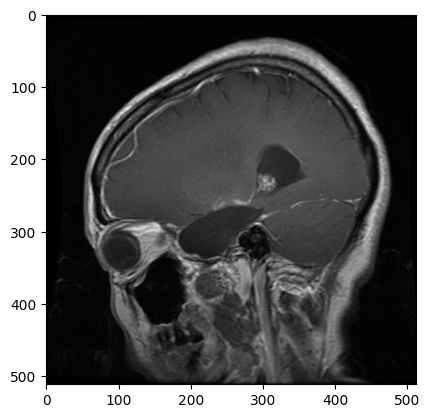

In [11]:
show_example(*dataset[3])


Label:  glioma_tumor (0)


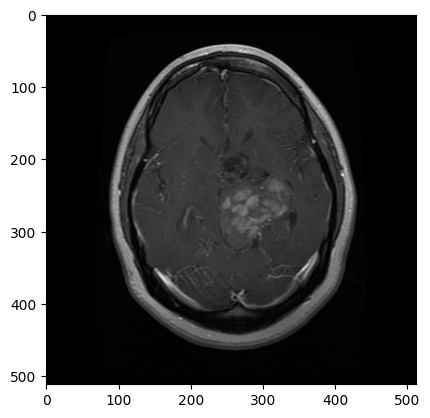

In [12]:
show_example(*dataset[0])

In [13]:
torch.manual_seed(42); # Seed is fixed
from torch.utils.data.dataloader import DataLoader
from torchvision import datasets, transforms
from torch.utils.data import random_split

In [14]:
data_dir = './tumors/Training'
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Calculer les tailles pour le split (70% pour l'entraînement, 30% pour la validation)
train_percent = 0.7
train_size = int(train_percent * len(dataset))
val_size = len(dataset) - train_size
print(f"Taille d'entraînement: {train_size}, Taille de validation: {val_size}")

# Diviser le dataset en ensembles d'entraînement et de validation
train_ds, val_ds = random_split(dataset, [train_size, val_size])

# Créer les DataLoaders
batch_size = 16
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=batch_size, shuffle=True)

Taille d'entraînement: 364, Taille de validation: 156


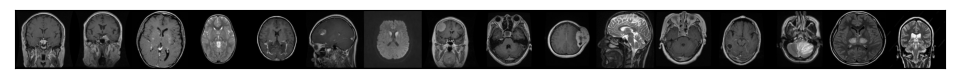

In [15]:
from torchvision.utils import make_grid

def show_batch(dl):
  for images, labels in dl:
    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
    break
show_batch(train_dl)


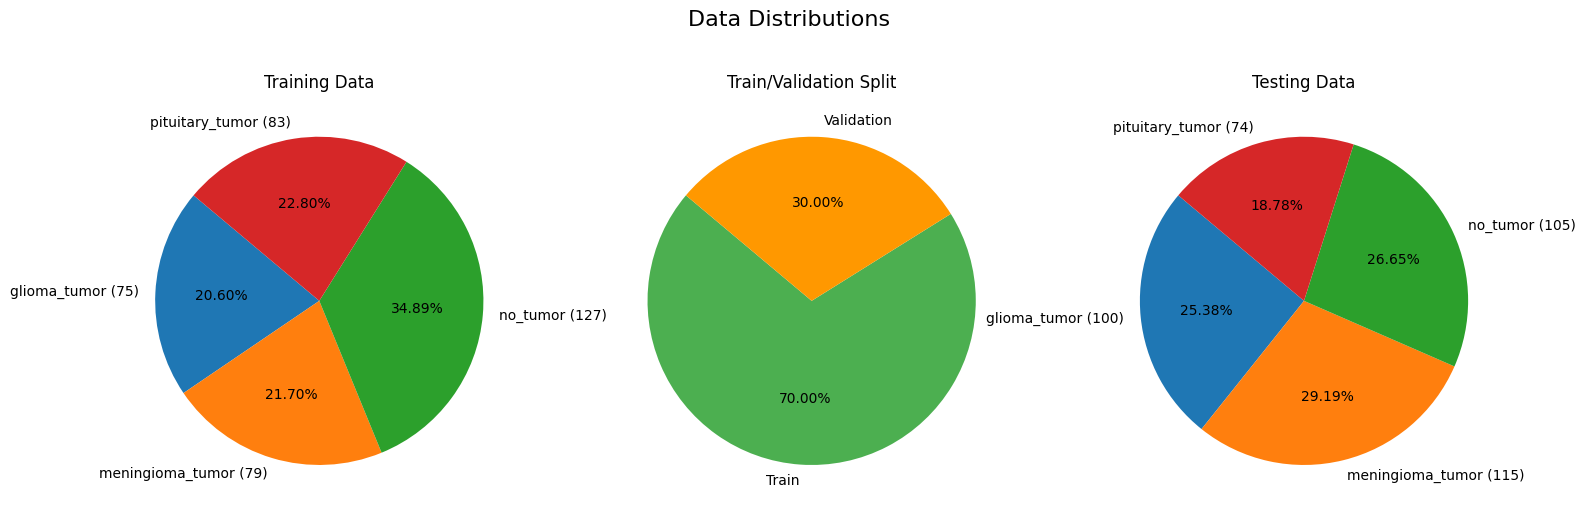

In [16]:
# Calculer la distribution des classes dans l'ensemble de test (qui reste inchangé)
test_folder = './tumors/Testing'
test_counts = {}
for class_name in os.listdir(test_folder):
    class_folder = os.path.join(test_folder, class_name)
    if os.path.isdir(class_folder):
        test_counts[class_name] = len([f for f in os.listdir(class_folder) if f.lower().endswith('.jpg')])

# Afficher les distributions avec des diagrammes circulaires
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Distribution de l'ensemble d'entraînement
train_counts = {label: 0 for label in dataset.classes}
for _, label in train_ds:
    train_counts[dataset.classes[label]] += 1
axs[0].pie(train_counts.values(), labels=[f"{k} ({v})" for k, v in train_counts.items()],
           autopct='%1.2f%%', startangle=140, textprops={'fontsize': 10})
axs[0].set_title("Training Data")

# Répartition entraînement/validation
axs[1].pie([train_size, val_size], labels=['Train', 'Validation'],
           autopct='%1.2f%%', startangle=140, colors=['#4CAF50', '#FF9800'], textprops={'fontsize': 10})
axs[1].set_title("Train/Validation Split")

# Distribution de l'ensemble de test
axs[2].pie(test_counts.values(), labels=[f"{k} ({v})" for k, v in test_counts.items()],
           autopct='%1.2f%%', startangle=140, textprops={'fontsize': 10})
axs[2].set_title("Testing Data")

plt.suptitle("Data Distributions", fontsize=16)
plt.show()

In [17]:
import torch.nn as nn
import torch.nn.functional as F

In [18]:
class TumorCnnModel(nn.Module):

  def __init__(self):
    super(TumorCnnModel, self).__init__()

    self.nn = nn.Sequential(
        #input: 3 x 512 x 512 C, H, W , taiile de l'image
        nn.Conv2d(3, 32, kernel_size = 3, stride= 1),
        nn.ReLU(),  
        #output: 32 x 510 x 510

        nn.Conv2d(32, 32, kernel_size = 3, stride= 1),
        nn.ReLU(),
        #output 32 x 508 x 508

        nn.MaxPool2d(4,4), 
        #Output 32 x 127 x 127 )
       )
    
    self.fc = nn.Sequential(
            nn.Linear(32 * 127 * 127, 4)
        )

  def forward(self, x):
      out = self.nn(x)
      out = out.view(out.size(0), -1)
      out = self.fc(out)
      out = torch.softmax(out, dim=1)
      return out

In [19]:
import torch
import torch.nn as nn

class TumorCnnModel(nn.Module):
    def __init__(self):
        super(TumorCnnModel, self).__init__()

        self.nn = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(4, 4)
        )

        # Calculate the output size after the convolutional layers
        with torch.no_grad():
            sample_input = torch.zeros(1, 3, 512, 512)  # Simulate a single image input
            output = self.nn(sample_input)
            self.flattened_size = output.view(1, -1).size(1)  # Get the flattened size
            print("Calculated flattened size:", self.flattened_size)  # Debugging output

        # Define the fully connected layer with the calculated flattened size
        self.fc = nn.Sequential(
            nn.Linear(self.flattened_size, 4)
        )

    def forward(self, x):
        out = self.nn(x)
        #print("Shape after conv layers:", out.shape)  
        out = out.view(out.size(0), -1)  # Flatten the tensor
        #print("Shape after flattening:", out.shape)  # Debugging 
        out = self.fc(out)
        out = torch.softmax(out, dim=1)
        return out


In [20]:
model = TumorCnnModel()
model

Calculated flattened size: 516128


TumorCnnModel(
  (nn): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=516128, out_features=4, bias=True)
  )
)

In [21]:
for images, labels in train_dl:
  print('images.shape:', images.shape)
  out = model(images)
  print('out.shape', out.shape)
  print('out[0]', out[0])
  break

images.shape: torch.Size([16, 3, 512, 512])
out.shape torch.Size([16, 4])
out[0] tensor([0.2519, 0.2471, 0.2519, 0.2491], grad_fn=<SelectBackward0>)


In [22]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device' +str(device))

Using devicecuda


In [23]:
!pip install torchsummary

In [24]:
#Summary
from torchsummary import summary

CNN = TumorCnnModel() #Initialization
CNN.to(device = device)
summary(CNN, (3, 512, 512))

Calculated flattened size: 516128
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 510, 510]             896
              ReLU-2         [-1, 32, 510, 510]               0
            Conv2d-3         [-1, 32, 508, 508]           9,248
              ReLU-4         [-1, 32, 508, 508]               0
         MaxPool2d-5         [-1, 32, 127, 127]               0
            Linear-6                    [-1, 4]       2,064,516
Total params: 2,074,660
Trainable params: 2,074,660
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 3.00
Forward/backward pass size (MB): 256.95
Params size (MB): 7.91
Estimated Total Size (MB): 267.86
----------------------------------------------------------------


In [25]:
def trainval(nepoch, train_loader, valid_loader, model, optimizer, criterion):

    training_losses = []
    valid_losses = []
    
    for epoch in range(nepoch):

        training_loss = 0
        valid_loss = 0

        #train the model
        model.train()
        for images, label in train_loader:
            images = images.to(device=device, dtype = torch.float32)
            label = label.to(device=device, dtype = torch.long)
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, label)
            loss.backward()
            optimizer.step()
            training_loss += loss.item() * images.size(0)

        #Validate the model
        model.eval()
        for images, label in valid_loader:
            images = images.to(device=device, dtype = torch.float32)
            label = label.to(device=device, dtype = torch.long)
            with torch.no_grad():
                output = model(images)
                loss = criterion(output, label)
                valid_loss += loss.item() * images.size(0) 
        
        # calculate average loss over an epoch
        training_loss /= len(train_loader.sampler)
        valid_loss /= len(valid_loader.sampler)
        training_losses.append(training_loss)
        valid_losses.append(valid_loss)
    
        print(f'Epoch {epoch+1}: Training Loss : {training_loss:.6f}, Validation Loss : {valid_loss:.6f}')

    return training_losses, valid_losses



In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(CNN.parameters(), lr = 0.01)
epochs = 100
train_losses_1, valid_losses_1 = trainval(epochs, train_dl, val_dl, CNN, optimizer, criterion)

Epoch 1: Training Loss : 1.343499, Validation Loss : 1.346808
Epoch 2: Training Loss : 1.288079, Validation Loss : 1.245444
Epoch 3: Training Loss : 1.215121, Validation Loss : 1.203214
Epoch 4: Training Loss : 1.126216, Validation Loss : 1.121429
Epoch 5: Training Loss : 1.034740, Validation Loss : 1.148032
Epoch 6: Training Loss : 1.024566, Validation Loss : 1.103853
Epoch 7: Training Loss : 0.917029, Validation Loss : 0.934312
Epoch 8: Training Loss : 0.890356, Validation Loss : 0.961883
Epoch 9: Training Loss : 0.884137, Validation Loss : 1.066704
Epoch 10: Training Loss : 0.835692, Validation Loss : 0.902457
Epoch 11: Training Loss : 0.821712, Validation Loss : 0.886256
Epoch 12: Training Loss : 0.799631, Validation Loss : 0.863043
Epoch 13: Training Loss : 0.809495, Validation Loss : 0.865047
Epoch 14: Training Loss : 0.791761, Validation Loss : 0.927586
Epoch 15: Training Loss : 0.800731, Validation Loss : 0.875066
Epoch 16: Training Loss : 0.786167, Validation Loss : 0.852237
E

Text(0, 0.5, 'loss value')

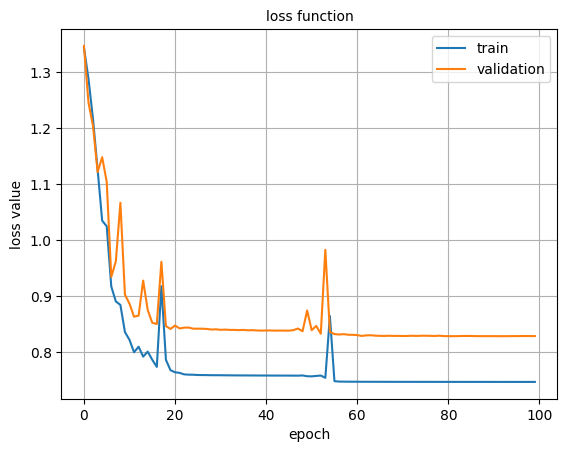

In [34]:
plt.plot(range(epochs), train_losses_1)
plt.plot(range(epochs), valid_losses_1)
plt.legend(['train', 'validation'], prop={'size': 10})
plt.title('loss function', size=10)
plt.xlabel('epoch', size=10)
plt.grid(True)
plt.ylabel('loss value', size=10)

Training and validation loss flectuate => Change hyperparameters ( lr or optimization algorithm (I can test Adam algo instead)).\
But I will test it anyway.

**Testing my model**

In [31]:
#dataset = torchvision.datasets.ImageFolder(root=data_dir + '/Training', transform=transform)
test_data = torchvision.datasets.ImageFolder(root='./tumors' + '/Testing', transform=transform)
test_ld = DataLoader(test_data, batch_size)
print(test_data.classes)
print(test_ld)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [37]:
# Définir l'appareil
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Déplacer le modèle sur l'appareil
model = model.to(device)

# Fonction d'évaluation
def evaluate_model(model, test_loader, criterion):
    test_loss = 0
    correct = 0
    total = 0

    model.eval()  # Initialise le mode évaluation

    with torch.no_grad():
        for data, labels in test_loader:
            data, labels = data.to(device), labels.to(device)
            outputs = model(data)
            loss = criterion(outputs, labels)

            test_loss += loss.item() * data.size(0)

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    test_loss = test_loss / len(test_loader.dataset)
    test_accuracy = correct / total

    print('Test Loss: {:.6f}'.format(test_loss))
    print('Test Accuracy: {:.2f}% ({}/{})'.format(test_accuracy * 100, correct, total))

    return test_loss, test_accuracy

# Appeler la fonction d'évaluation
evaluate_model(model, test_ld, criterion)


Test Loss: 1.386677
Test Accuracy: 25.89% (102/394)


(1.3866773910328822, 0.25888324873096447)